## Import 

In [68]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
import numpy as np

## Extraction d'un jeu de donnees

In [2]:
from modules.splitting import Splitting

TRAIN_DATA_DIR = '../datas/RAW/train_apple_bee'

Splitting.copie_dossiers(
    '../datas/RAW/train',
    ['apple', 'bee'],
    500,
    True
)

Successfully created the directory c:\Users\utilisateur\Documents\datas\RAW\train_apple_bee
Creation du dossier apple
Creation du dossier bee


## Chargement des images

In [3]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

# Taille d'image
TRAIN_IMAGE_SIZE = 32
# NB d'images envoyées à la fois
TRAIN_BATCH_SIZE = 64

train_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    )
 
validation_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR, # same directory as training data
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## Creation du modele

- convolution
- dense
- pooling

In [56]:
model = Sequential()

# Version de Maxime
# Conv2D()16
# mp
# de 16
# c 32
# mp
# de 32
# c 64

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3) ))

model.add(Dense(64, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu' ))
# model.add(MaxPooling2D( pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_23 (Dense)             (None, 30, 30, 64)        2112      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 100354    
Total params: 140,290
Trainable params: 140,290
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training = model.fit(train_generator, epochs=15, validation_data=validation_generator);

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 4 steps
Epoch 1/15
13/13 [==============================] - 11s 856ms/step - loss: 65.7067 - accuracy: 0.5638 - val_loss: 0.8786 - val_accuracy: 0.6700
Epoch 2/15
13/13 [==============================] - 9s 681ms/step - loss: 0.6158 - accuracy: 0.6800 - val_loss: 0.6132 - val_accuracy: 0.7450
Epoch 3/15
13/13 [==============================] - 9s 673ms/step - loss: 0.4389 - accuracy: 0.8062 - val_loss: 0.4877 - val_accuracy: 0.7700
Epoch 4/15
13/13 [==============================] - 9s 672ms/step - loss: 0.2936 - accuracy: 0.8737 - val_loss: 0.5138 - val_accuracy: 0.8200
Epoch 5/15
13/13 [==============================] - 9s 698ms/step - loss: 0.2086 - accuracy: 0.9325 - val_loss: 0.5458 - val_accuracy: 0.8100
Epoch 6/15
13/13 [==============================] - 9s 674ms/step - loss: 0.1412 - accuracy: 0.9475 - val_loss: 0.5069 - val_accuracy: 0.8450
Epoch 7/15
13/13 [==============================] - 9s 

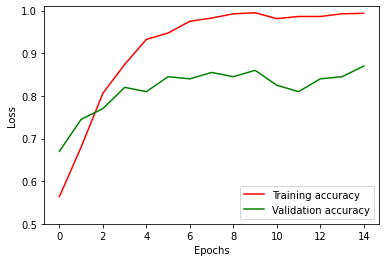

In [58]:
plt.plot(training.history['accuracy'], color='red', label='Training accuracy')
plt.plot(training.history['val_accuracy'],  color='green', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.ylim((.5,1.01))

plt.show()

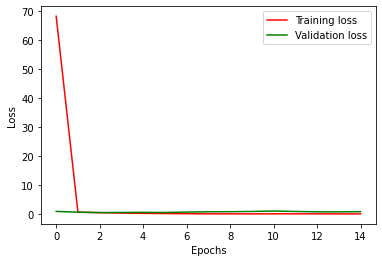

In [59]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

In [60]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_23 (Dense)             (None, 30, 30, 64)        2112      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 100354    
Total params: 140,290
Trainable params: 140,290
Non-trainable params: 0
_________________________________________________________________


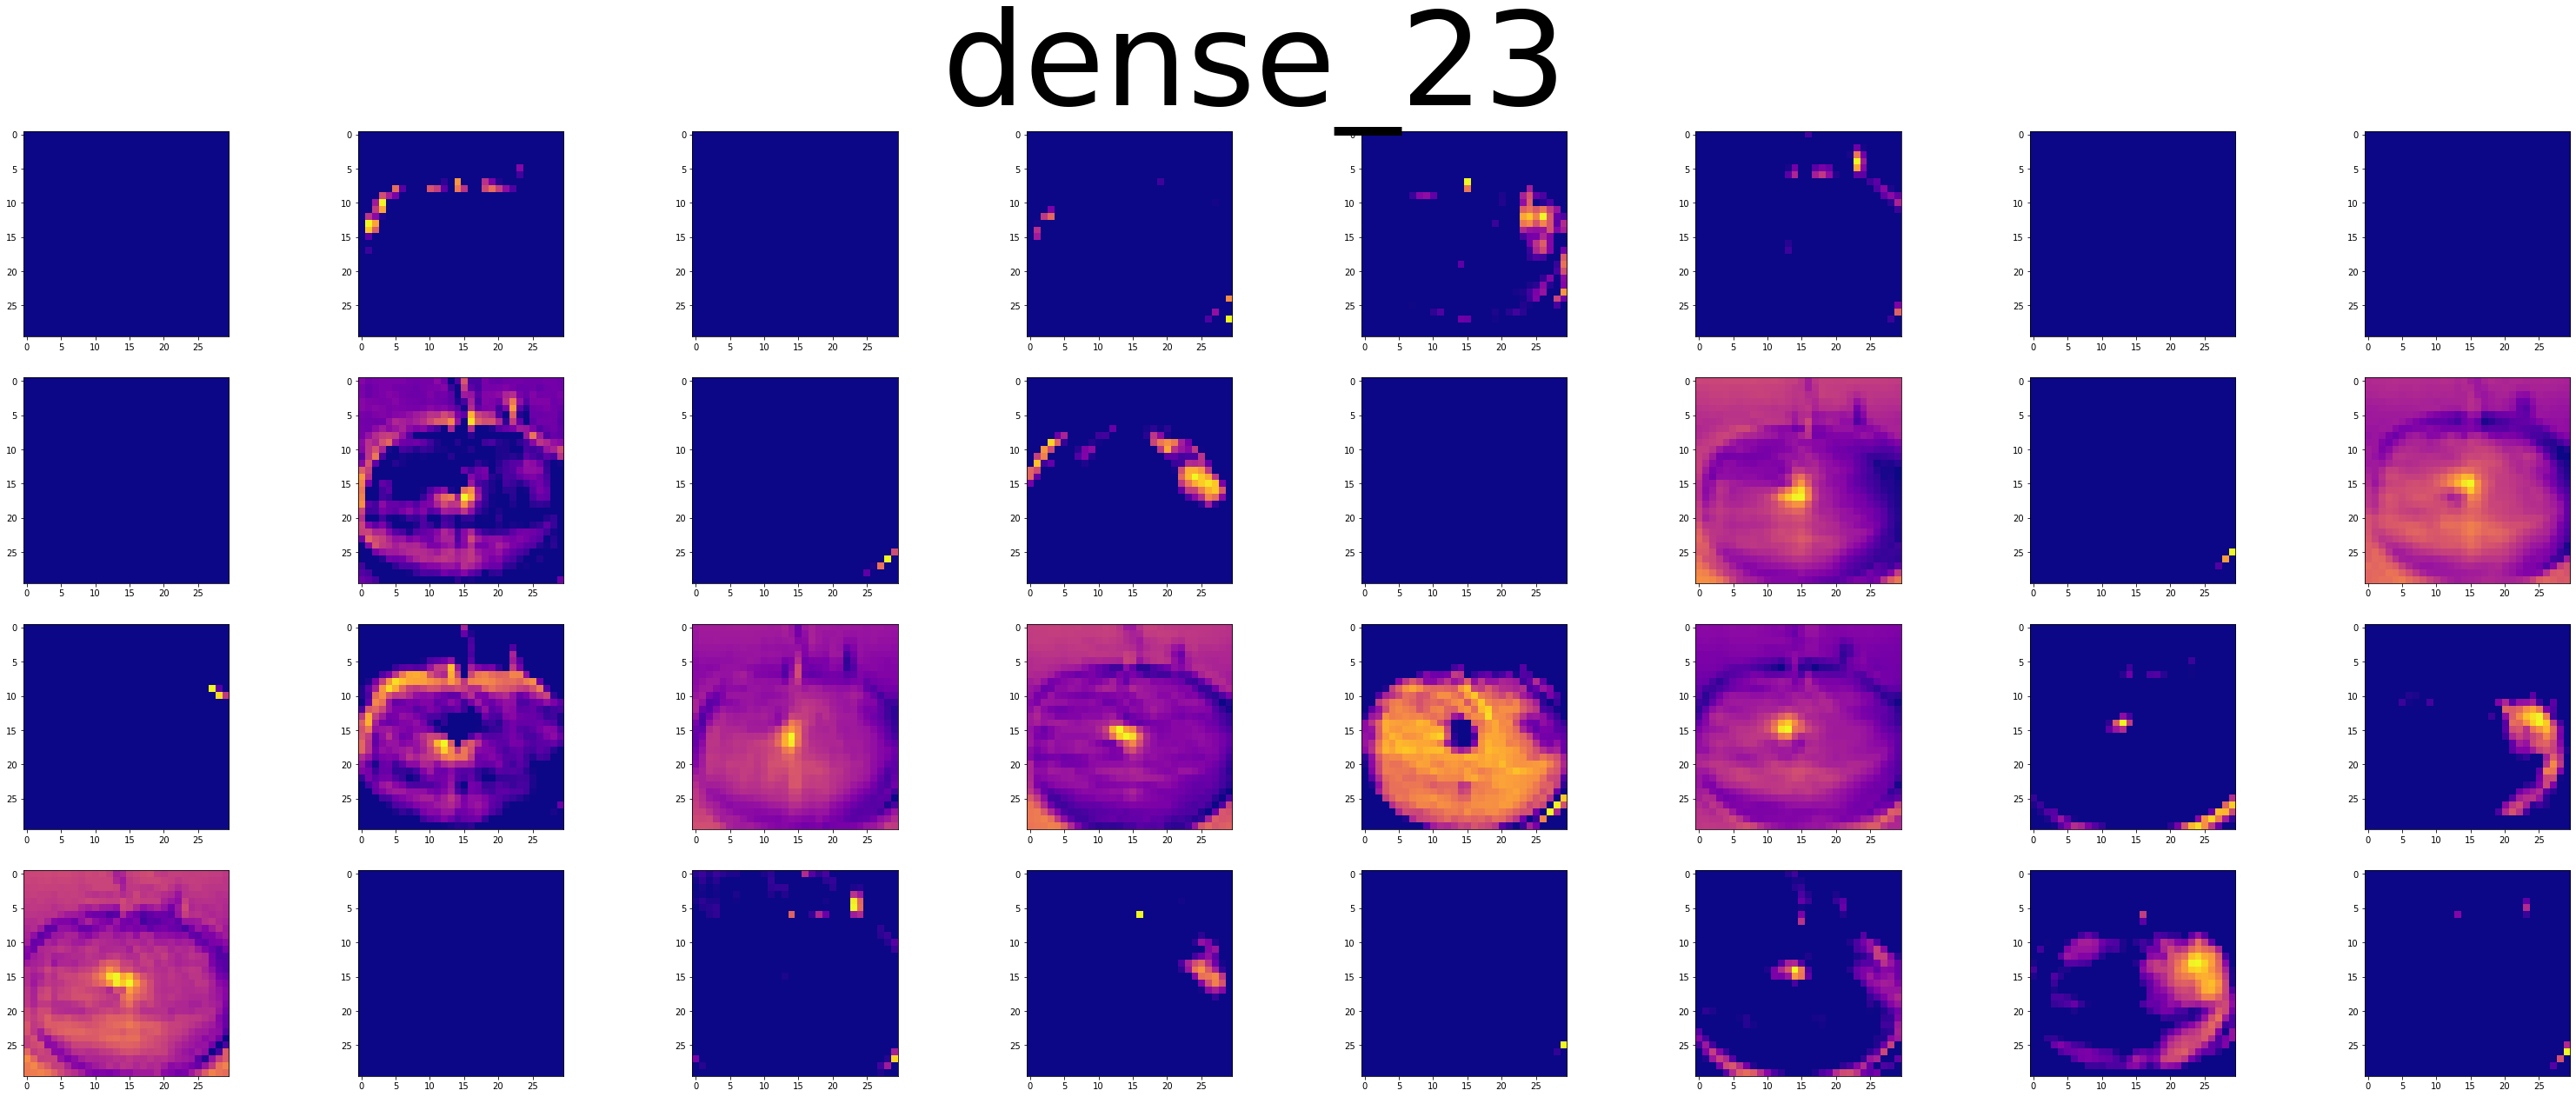

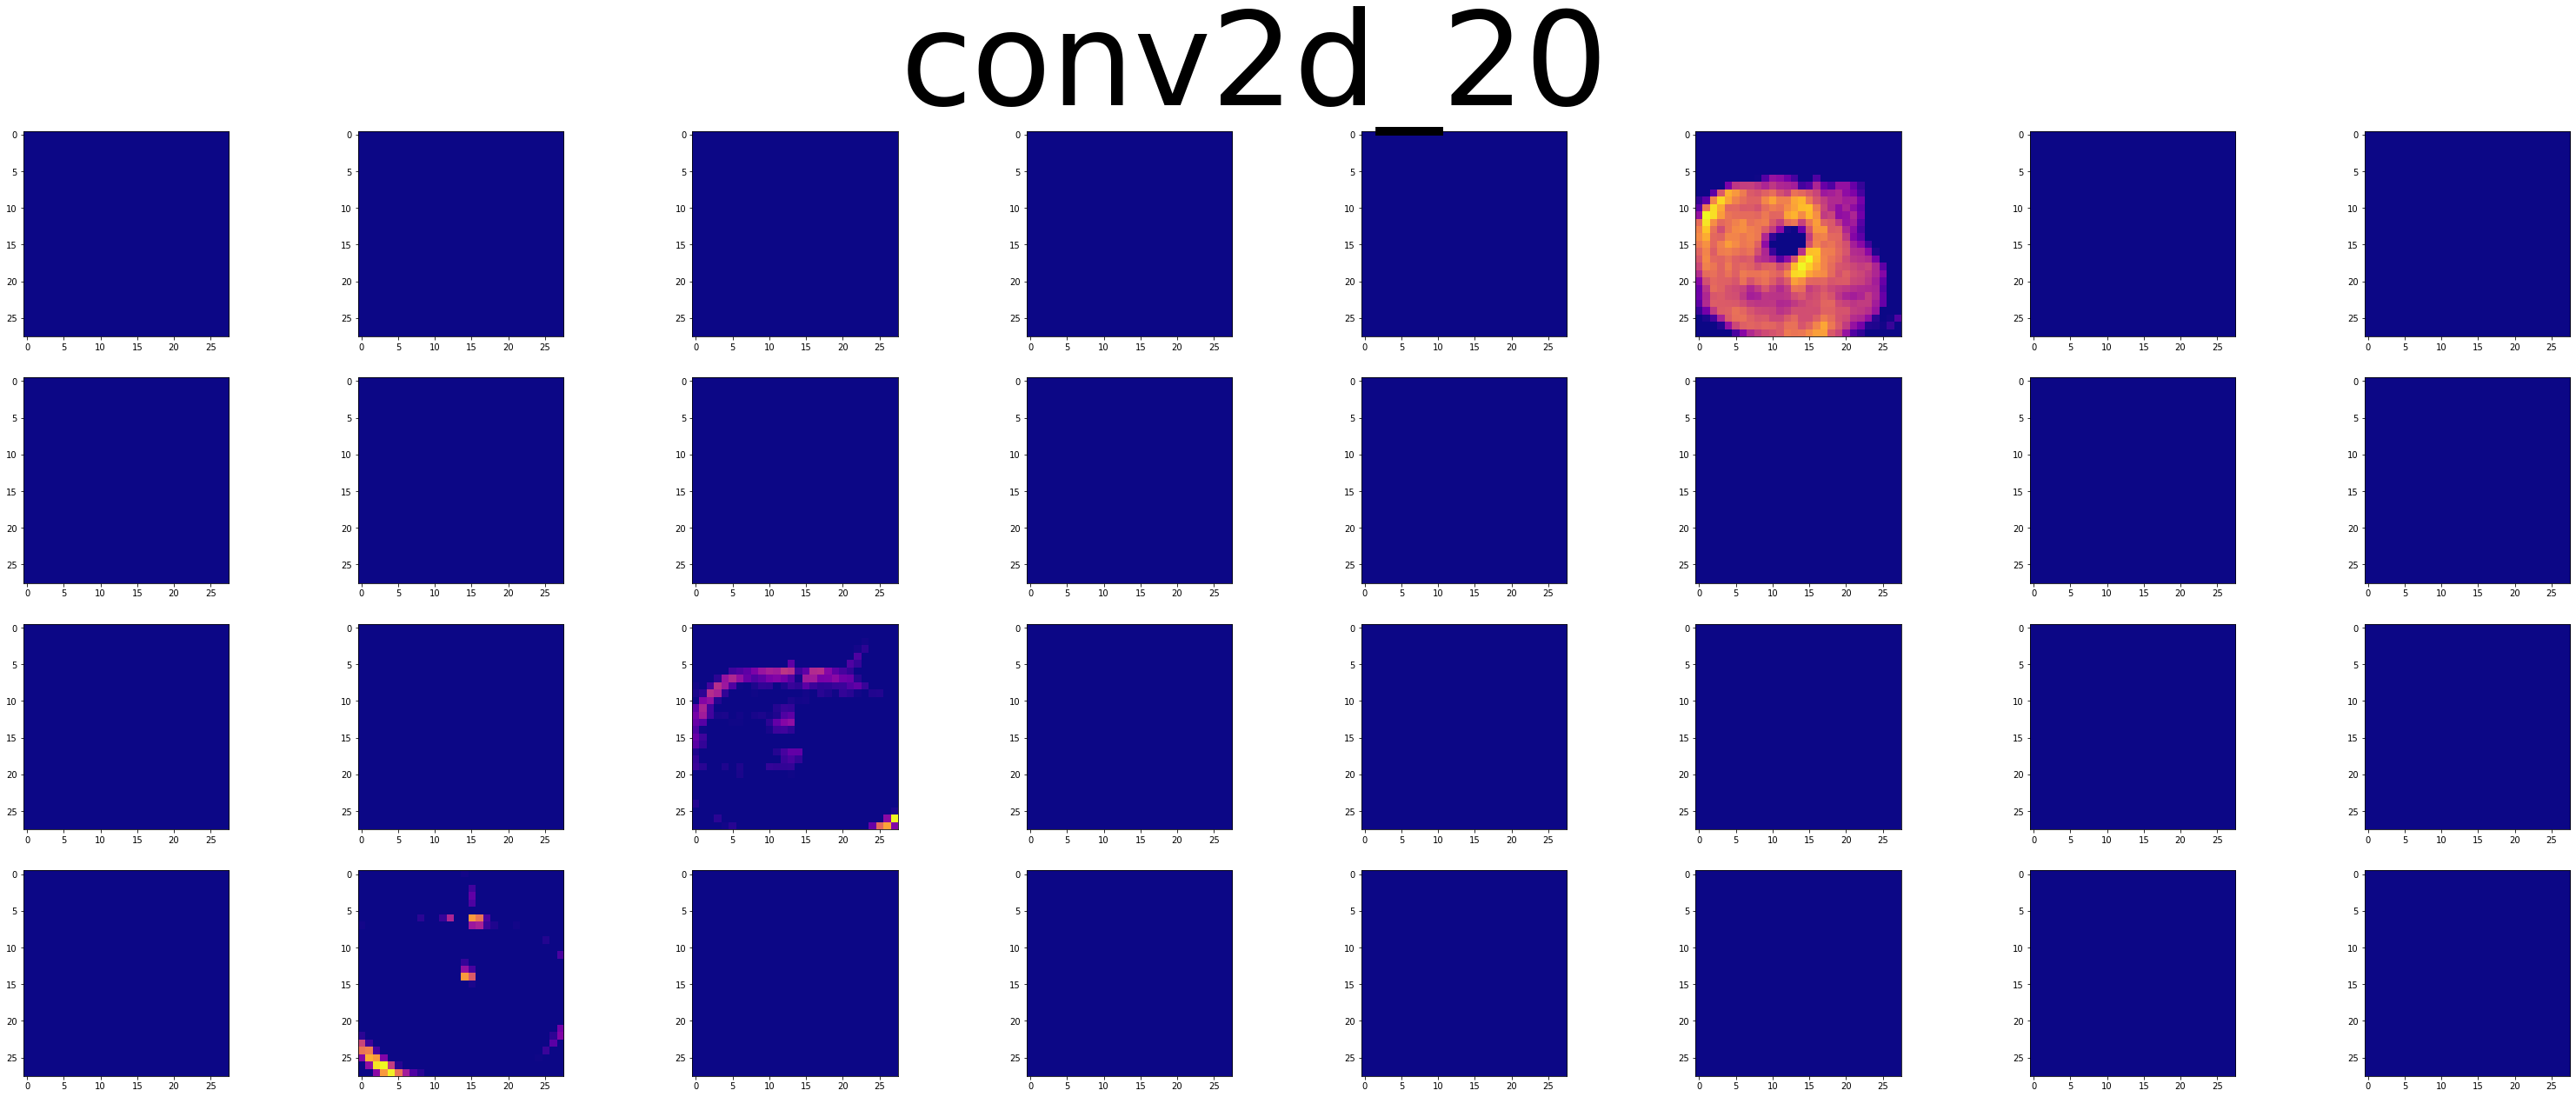

In [61]:
from modules.observation_modele import plot_layer

image = "../datas/RAW/train/apple/0020.png"
# plt.imshow(plt.imread(image))

# plot_layer(model, image, 0)
plot_layer(model, image, 1)
plot_layer(model, image, 2)

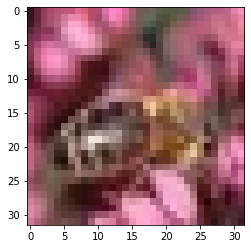

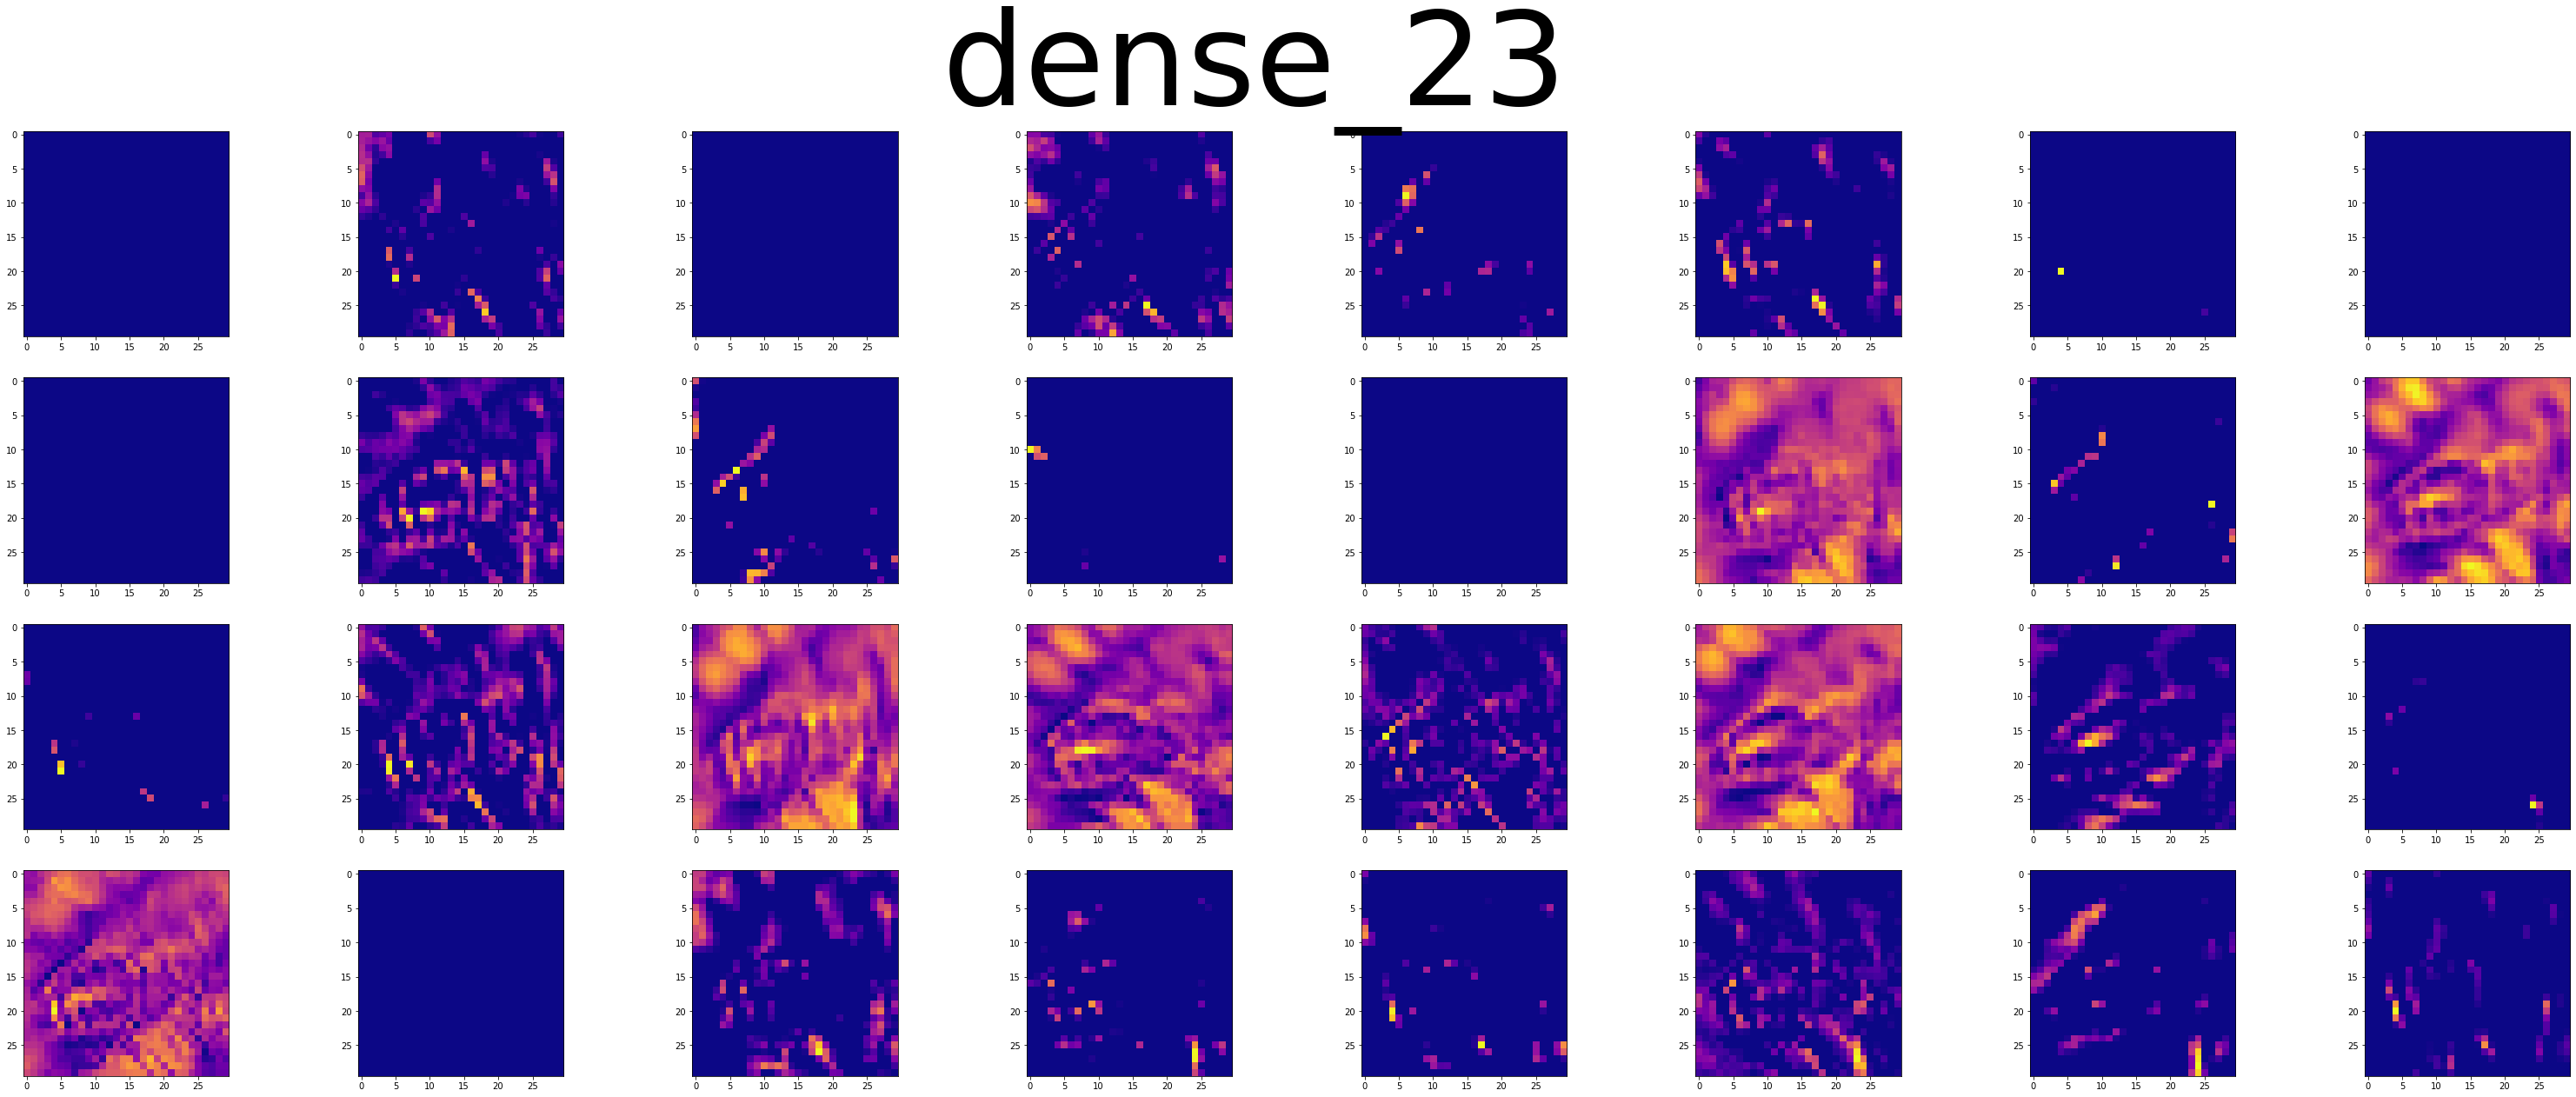

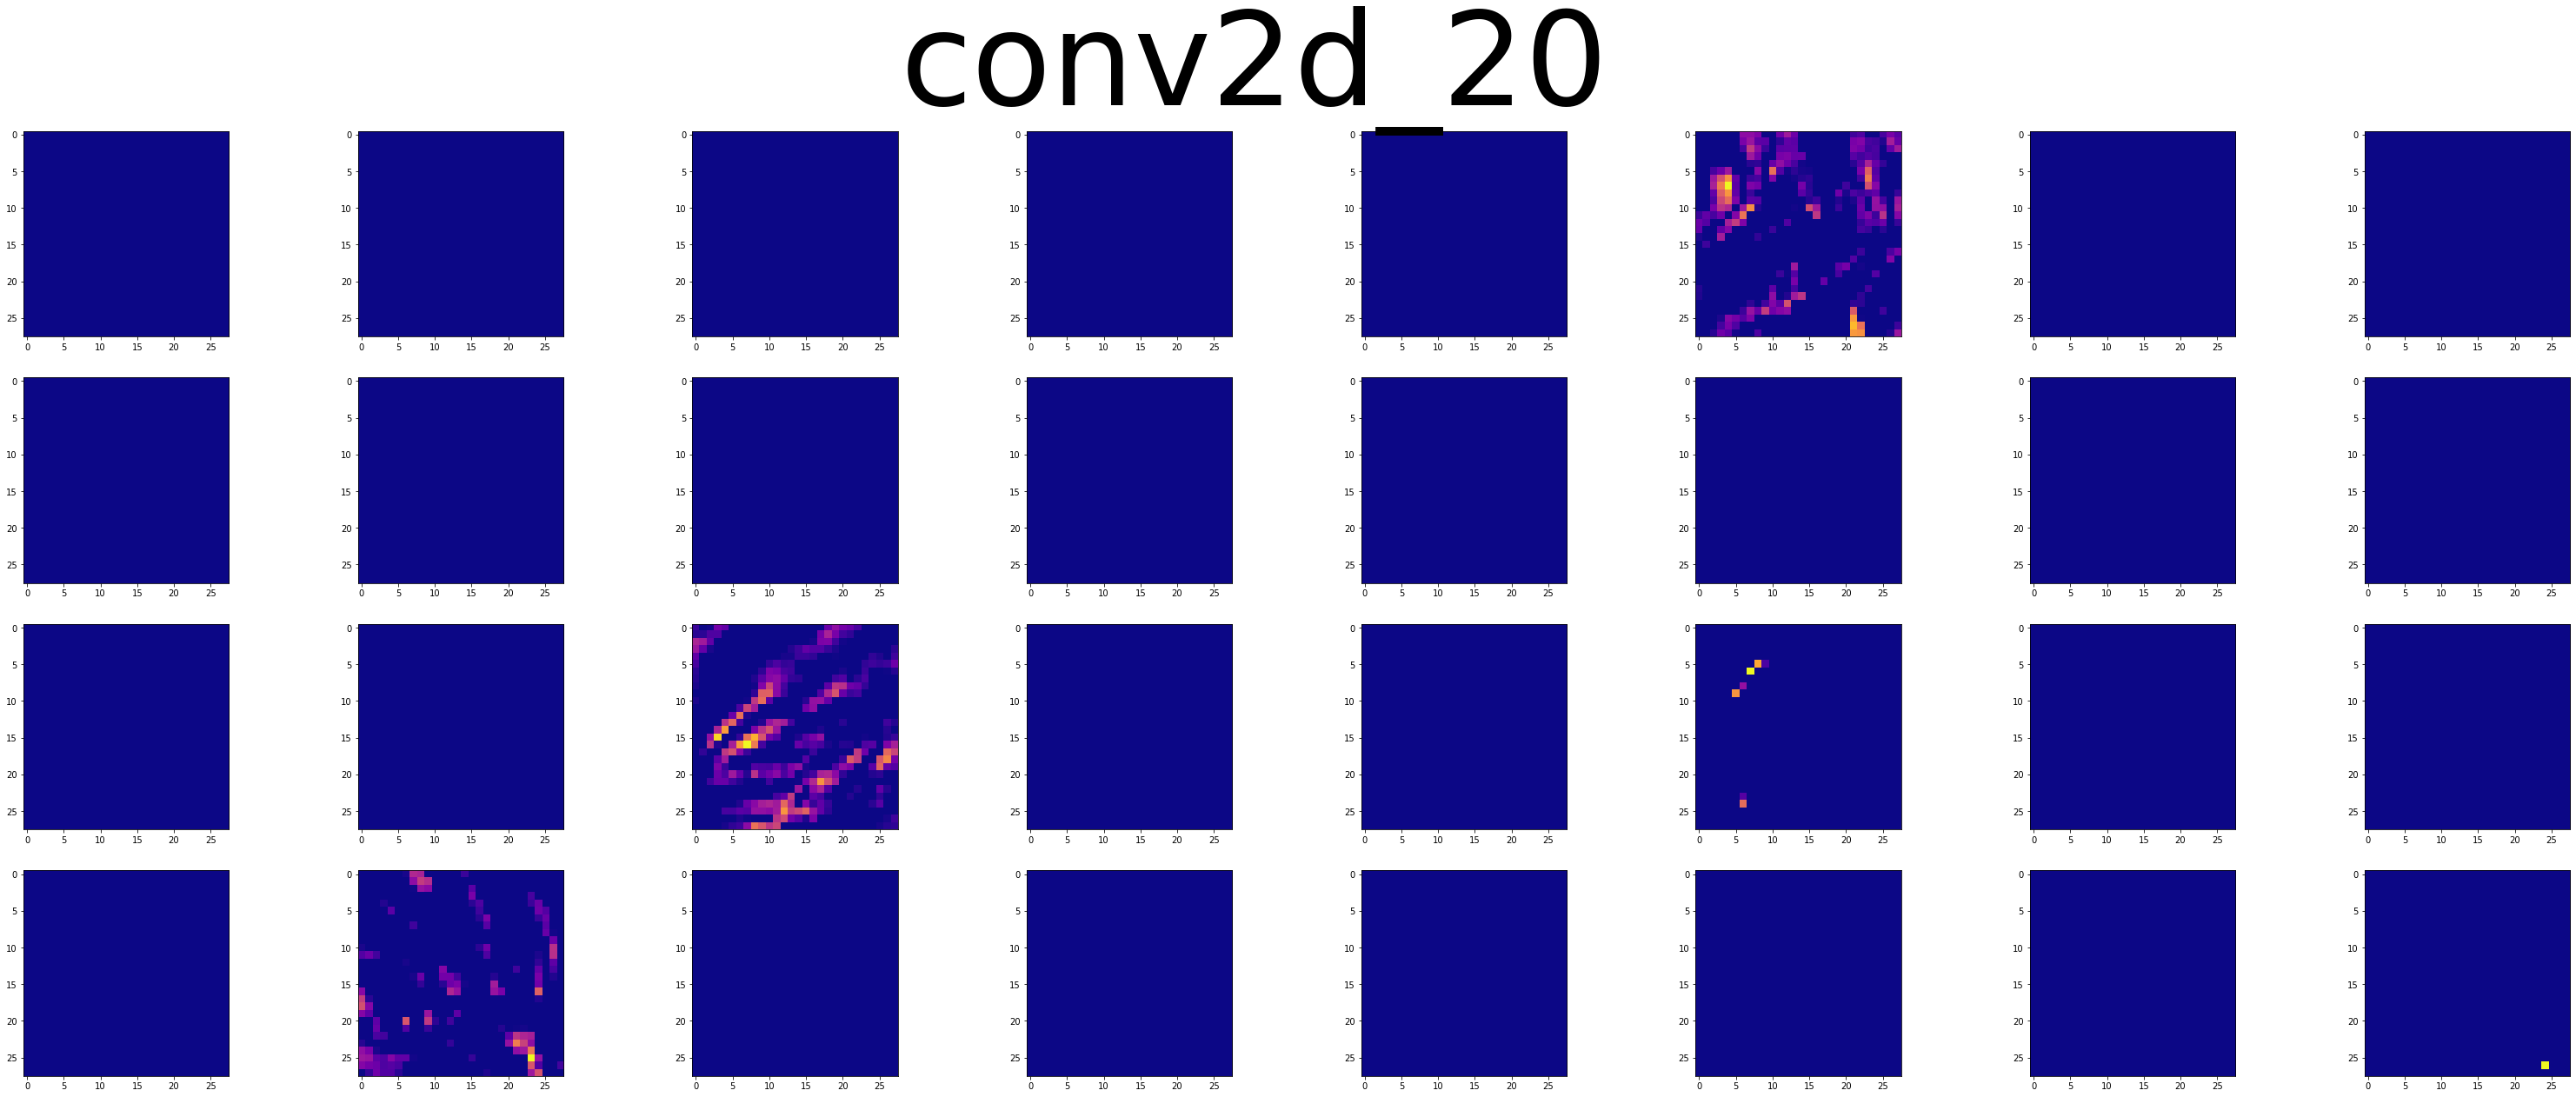

In [62]:
from modules.observation_modele import plot_layer

image = "../datas/RAW/train/bee/0103.png"
plt.imshow(plt.imread(image))

# plot_layer(model, image, 0)
plot_layer(model, image, 1)
plot_layer(model, image, 2)


In [98]:
model_name = 'model.h5'

model.save(model_name)

labels_array = ['apple', 'bee']

from tensorflow.keras.models import load_model

choix = [
    'assets/apple/0001.png'
    , 
]
test_model = load_model(model_name)

for c in choix:
    test_image = image.load_img(c, target_size = (32, 32))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = test_model.predict(test_image)

    preds = test_model.predict_classes(test_image)
    prob = test_model.predict_proba(test_image)

    index = preds[0]
    print(f'Cet objet est un(e) "{labels_array[index]}".')

    prob_sort = np.argsort(prob[0])[-2:]

    for ps in prob_sort:
        proba = prob[0][ps]
        print(np.where(prob == prob[0][ps]))
        label = labels_array[0]
        print(f'{label}: {proba}')

    print()

Cet objet est un(e) "apple".


AttributeError: 'numpy.ndarray' object has no attribute 'index'